In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_excel('Doctor_Train.xlsx')
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
df_test=pd.read_excel('Doctor_Test.xlsx')
df_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [4]:
df_train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

findings: all data type are object except Fees 

In [5]:
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Observations: There is null value is present in Ratings,Place and Misscellaneous_Info column

In [6]:
#Replacing null value with most frequent value
imp=SimpleImputer(strategy='most_frequent')
df_train['Rating']=imp.fit_transform(df_train['Rating'].values.reshape(-1,1))
df_train['Miscellaneous_Info']=imp.fit_transform(df_train['Miscellaneous_Info'].values.reshape(-1,1))
df_train['Place']=imp.fit_transform(df_train['Place'].values.reshape(-1,1))

In [7]:
#again checking for null value is present or not in dataset
df_train.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

In [8]:
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [9]:
#Replacing null value with most frequent value in test dataset
imp=SimpleImputer(strategy='most_frequent')
df_test['Rating']=imp.fit_transform(df_test['Rating'].values.reshape(-1,1))
df_test['Miscellaneous_Info']=imp.fit_transform(df_test['Miscellaneous_Info'].values.reshape(-1,1))
df_test['Place']=imp.fit_transform(df_test['Place'].values.reshape(-1,1))

In [10]:
df_test.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

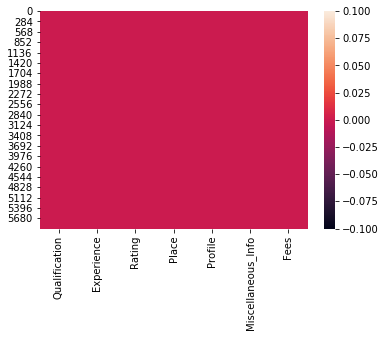

In [11]:
sns.heatmap(df_train.isnull())

Observation:by above heatmap we conclude there is no nnull value in training dataset 

In [12]:
#Printing all column name in dataset
df_train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [13]:
#Checking value count for each catogorical data
lst=['Qualification', 'Experience', 'Rating', 'Place', 'Profile','Miscellaneous_Info']
for i in lst:
    print(i,'\n',df_train[i].value_counts())

Qualification 
 BDS                                                                                 488
BHMS                                                                                477
BAMS                                                                                471
MBBS                                                                                334
MBBS, MS - ENT                                                                      220
                                                                                   ... 
BHMS, Certificate in Sports Nutrition, Fellowship in Cardiac Rehabilitation           1
MBBS, IBCLC (USA)                                                                     1
MBBS, MD - Family Medicine, Master of Public Health (MPH), Diploma in Cardiology      1
BDS, MDS, Fellowship In Cosmetic Dermatology                                          1
MBBS, MRCP (UK), CCT - Dermatology, Diploma in ABLS (USA)                             1
Name: Qualificat

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              5961 non-null   object
 3   Place               5961 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  5961 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [15]:
df_train.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


there is maximum difference in 75% and max so outliers is present in dataset

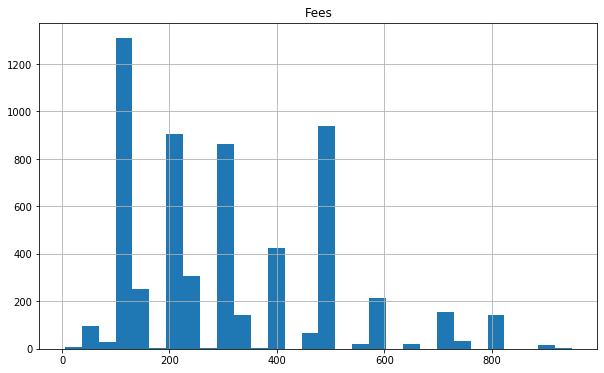

In [16]:
df_train.hist(bins = 30, figsize=(10,6));

observation:maximum fees is around 100

In [17]:
#There is only one numerical column
cor=df_train.corr()
cor

,Fees
Fees,1.0


# Data Visualization

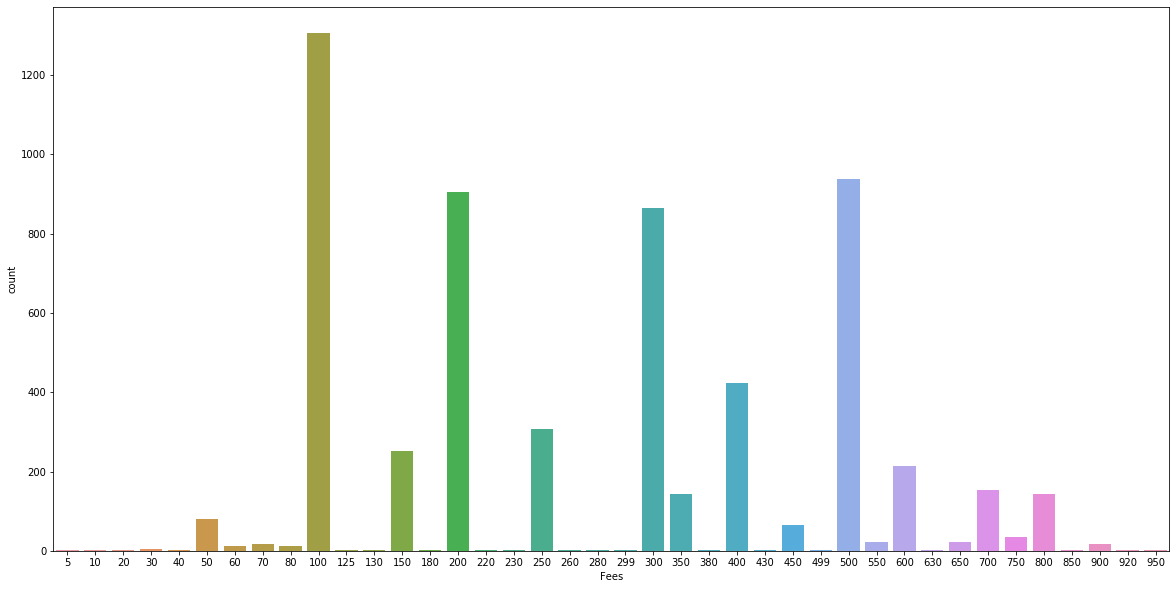

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(df_train['Fees'])

Observation:Maximum fees is 100

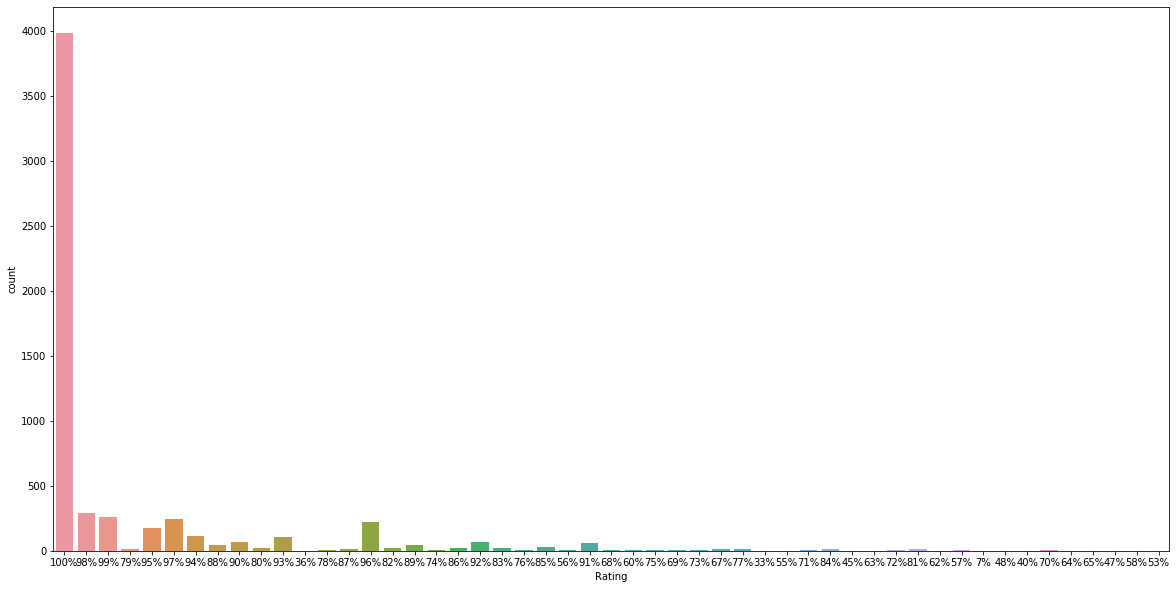

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(df_train['Rating'])

Observation:Maximum rating is 100% and around 4000 doctor having 100% rating

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 64 Text xticklabel objects>)

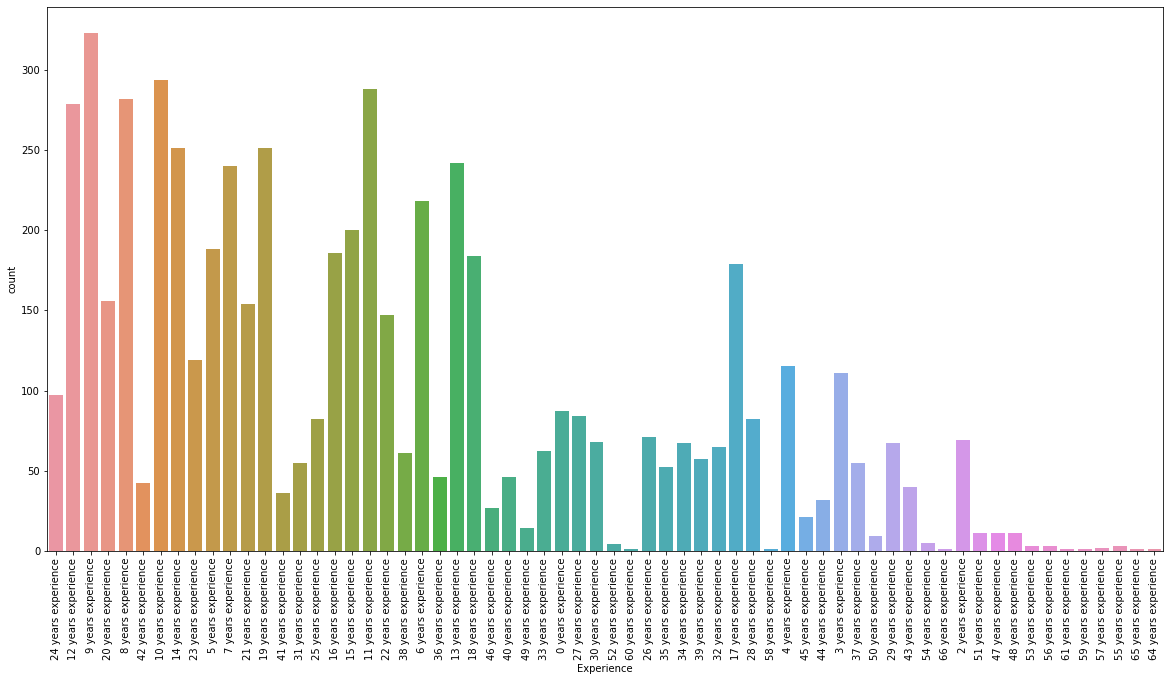

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(df_train['Experience'])
plt.xticks(rotation=90)

maximum doctor having experience of 9 years

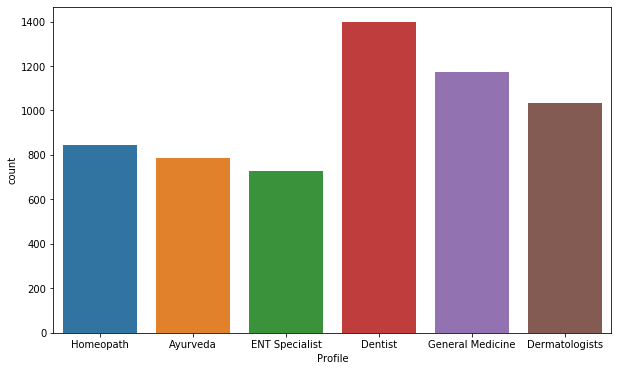

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(df_train['Profile'])

Around 1380 doctors are dentist

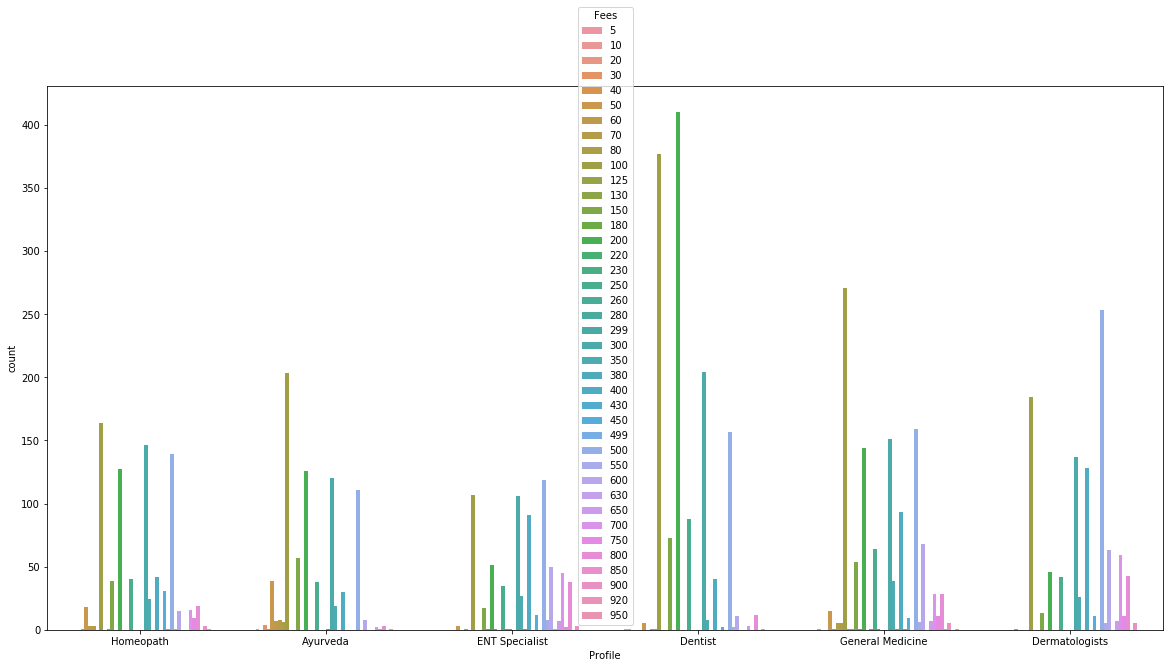

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(df_train['Profile'],hue=df_train['Fees'])

more dentists charges 200 rupees fees

In [23]:
#converssion catogorical column into numerical coulmn
le=LabelEncoder()
lst=['Qualification','Rating','Place', 'Profile','Miscellaneous_Info']
for i in lst:
    df_train[i]=le.fit_transform(df_train[i])


In [24]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401,24 years experience,0,299,5,130,100
1,73,12 years experience,49,866,0,1422,350
2,1135,9 years experience,0,457,3,1595,300
3,464,12 years experience,0,68,0,1695,250
4,10,20 years experience,0,337,0,253,250


In [25]:
#converssion catogorical column into numerical coulmn for testing dataset
le=LabelEncoder()
lst=['Qualification','Rating', 'Place', 'Profile','Miscellaneous_Info']
for i in lst:
    df_test[i]=le.fit_transform(df_test[i])

In [26]:
# spliting the data and extracting only column
for i in df_train['Experience'].value_counts().index:
    array=i.split()
    df_train['Experience'].replace(i,int(array[0]),inplace=True)

for i in df_test['Experience'].value_counts().index:
    array=i.split()
    df_test['Experience'].replace(i,int(array[0]),inplace=True)
    

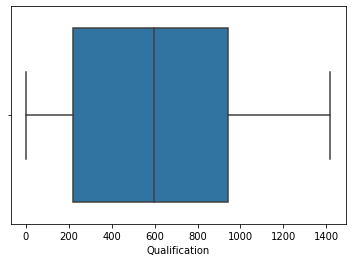

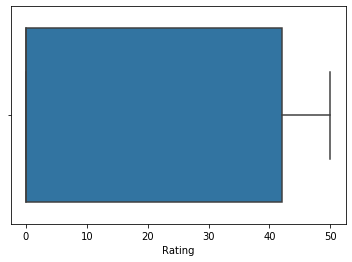

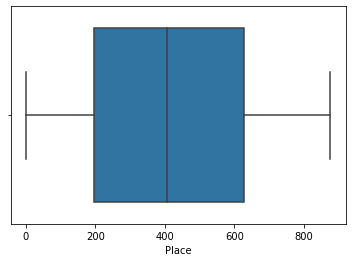

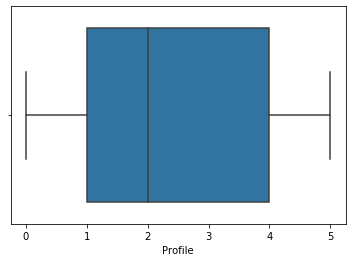

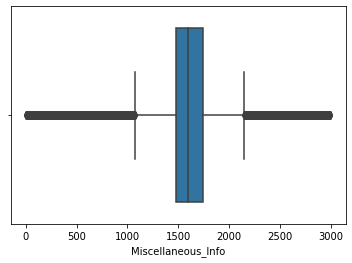

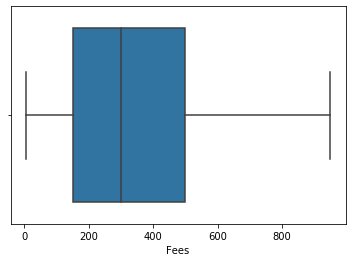

In [27]:
#checking outliers in all column column
lst=['Qualification','Rating', 'Place', 'Profile','Miscellaneous_Info','Fees']
for i in lst:
    plt.figure(i)
    sns.boxplot(df_train[i])

There are outliers present in miscellaneous_info column

In [28]:
#Checking the skewness
df_train.skew()

Qualification         0.239720
Experience            0.991089
Rating                0.817666
Place                 0.124862
Profile               0.108803
Miscellaneous_Info   -0.218459
Fees                  0.751870
dtype: float64

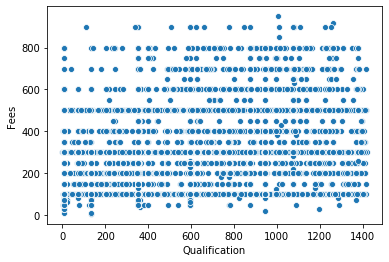

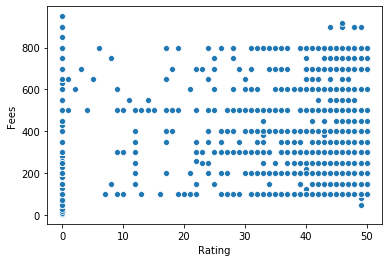

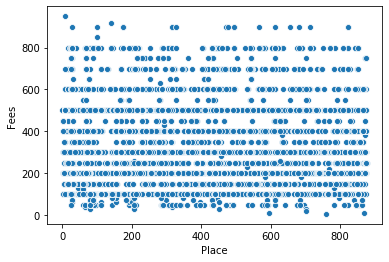

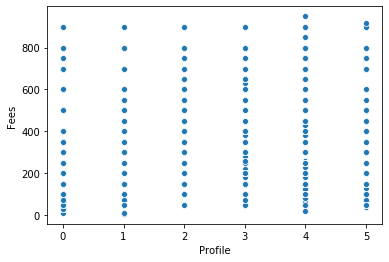

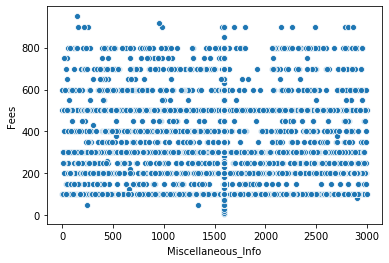

In [29]:
lst=['Qualification','Rating', 'Place', 'Profile','Miscellaneous_Info']
for i in lst:
    plt.figure(i)
    sns.scatterplot(x=df_train[i],y=df_train['Fees'])

Observation:Skewness in not present

In [30]:
df_test.skew()
#skewness not present in testing dataset

Qualification         0.280822
Experience            0.963447
Rating                0.850748
Place                 0.046487
Profile               0.028926
Miscellaneous_Info   -0.309475
dtype: float64

In [31]:
#Removing for outliers
z=np.abs(zscore(df_train))
z

array([[4.73305738e-01, 6.00978850e-01, 6.87653037e-01, ...,
        1.54301587e+00, 2.25404687e+00, 1.08926083e+00],
       [1.26594438e+00, 4.76040293e-01, 1.63068173e+00, ...,
        1.47289258e+00, 2.36351328e-01, 2.20295441e-01],
       [1.30046489e+00, 7.45295079e-01, 6.87653037e-01, ...,
        3.36652489e-01, 3.38199785e-02, 4.16158134e-02],
       ...,
       [2.07239780e-03, 2.12675597e+00, 1.58336878e+00, ...,
        9.39834180e-01, 6.25210608e-01, 1.52985171e+00],
       [8.36481290e-01, 2.06785507e-01, 1.25217810e+00, ...,
        9.39834180e-01, 9.81762078e-01, 1.08926083e+00],
       [8.55125573e-01, 2.72823168e-02, 6.87653037e-01, ...,
        8.69710893e-01, 3.38199785e-02, 5.65438323e-01]])

In [32]:
#Printing outliers present in dataset
threshold=3
print(np.where(z>3))

(array([ 105,  110,  183,  275,  293,  325,  372,  901,  987, 1009, 1111,
       1314, 1631, 1860, 1981, 2023, 2062, 2165, 2202, 2252, 2262, 2281,
       2393, 2428, 2522, 2623, 2631, 2708, 3180, 3365, 3478, 3493, 3608,
       3942, 3960, 4040, 4167, 4212, 4257, 4344, 4581, 4730, 4763, 4775,
       4835, 5195, 5250, 5265, 5277, 5311, 5410, 5422, 5587, 5637, 5664,
       5720, 5807, 5942], dtype=int64), array([1, 1, 1, 6, 6, 1, 1, 1, 6, 1, 1, 6, 6, 1, 1, 1, 1, 6, 1, 6, 1, 1,
       6, 6, 6, 6, 1, 6, 1, 6, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 6, 6, 1, 1,
       6, 6, 6, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))


In [33]:
df_train_new=df_train[(z<3).all(axis=1)]
df_train_new.shape

(5903, 7)

In [34]:
df_train.shape

(5961, 7)

In [35]:
df_train=df_train_new

In [36]:
x=df_train.drop('Fees',axis=1)
y=df_train['Fees']
print(x)
print(y)

      Qualification  Experience  Rating  Place  Profile  Miscellaneous_Info
0               401          24       0    299        5                 130
1                73          12      49    866        0                1422
2              1135           9       0    457        3                1595
3               464          12       0     68        0                1695
4                10          20       0    337        0                 253
...             ...         ...     ...    ...      ...                 ...
5956           1075          19      49     70        3                1385
5957            596          33       0    541        4                1595
5958            596          41      48    216        4                1173
5959            943          15      41    850        4                2202
5960            243          17       0    603        1                1595

[5903 rows x 6 columns]
0       100
1       350
2       300
3       250
4       250
   

In [37]:
#from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()
#x=ss.fit_transform(x)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [39]:
print(x_train.shape,'\t',x_test.shape)
print(y_train.shape,'\t',y_test.shape)

(4132, 6) 	 (1771, 6)
(4132,) 	 (1771,)


In [40]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [41]:
model=[LinearRegression(),Lasso(),Ridge(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('\n',m,'Model')
    print('Score',m.score(x_train,y_train))
    pred=m.predict(x_test)
    print("Errors:")
    print("Mean Squered=",mean_squared_error(y_test,pred))
    print("Mean absulate=",mean_absolute_error(y_test,pred))
    print("RMSC=",np.sqrt(mean_squared_error(y_test,pred)))
    print('r2_Score=',r2_score(y_test,pred))


 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) Model
Score 0.09611202360999649
Errors:
Mean Squered= 32408.91397468967
Mean absulate= 146.99826204700506
RMSC= 180.02475933795793
r2_Score= 0.09268044455433744

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) Model
Score 0.0960979875162371
Errors:
Mean Squered= 32413.169845999237
Mean absulate= 147.024312433349
RMSC= 180.03657918878383
r2_Score= 0.09256129723370676

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) Model
Score 0.09611202355916215
Errors:
Mean Squered= 32408.919616409017
Mean absulate= 146.99830031227526
RMSC= 180.02477500724453
r2_Score= 0.09268028660883221

 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_it

In [42]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
rf=RandomForestRegressor()
GB=GradientBoostingRegressor()

In [43]:
model=[rf,AdaBoostRegressor(),GB,BaggingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('\n',m,'Model')
    print('Score',m.score(x_train,y_train))
    pred=m.predict(x_test)
    print("Errors:")
    print("Mean Squered=",mean_squared_error(y_test,pred))
    print("Mean absulate=",mean_absolute_error(y_test,pred))
    print("RMSC=",np.sqrt(mean_squared_error(y_test,pred)))
    print('r2_Score=',r2_score(y_test,pred))


 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) Model
Score 0.8853078201028454
Errors:
Mean Squered= 30317.245972139957
Mean absulate= 134.68647387808878
RMSC= 174.11848256902528
r2_Score= 0.15123875612551352

 AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None) Model
Score 0.12403491709935265
Errors:
Mean Squered= 31826.00795775057
Mean absulate= 149.14946033310116
RMSC= 178.3984527896769
r2_Score= 0.10899947420676037

 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.

In [44]:
#Checking the best fit model with base estimator as 
adb=AdaBoostRegressor(base_estimator=GB,n_estimators=20,learning_rate=.1,random_state=42)
adb.fit(x_train,y_train)
print('Score',adb.score(x_train,y_train))
pred=adb.predict(x_test)
print("Errors:")
print("Mean Squered=",mean_squared_error(y_test,pred))
print("Mean absulate=",mean_absolute_error(y_test,pred))
print("RMSC=",np.sqrt(mean_squared_error(y_test,pred)))
print('r2_Score=',r2_score(y_test,pred))

Score 0.2881078224521223
Errors:
Mean Squered= 29205.50674089983
Mean absulate= 137.0365091398157
RMSC= 170.89618702855788
r2_Score= 0.18236299391540245


By the above result we can say RandomForest is the best model

In [45]:
score=cross_val_score(GB,x,y,cv=4)
print('cross validation=',score)
print(score.mean(),score.std())


cross validation= [0.19192739 0.17545002 0.20213289 0.20301466]
0.19313123952936567 0.011099399149174153


In [46]:
GB.predict(df_test)

array([310.29053444, 322.09908791, 353.5668933 , ..., 323.87398505,
       241.76280519, 276.32989665])

In [47]:
from sklearn.externals import joblib
joblib.dump(GB,'GB_DoctorDataset.pkl')

['GB_DoctorDataset.pkl']